### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMClassifier

In [2]:
# Load dataset 
df = joblib.load('database_dielectric_constant_merged.pkl')

# Define features and target variable
features = joblib.load('features_ferroelectric.pkl')
print('No. of features', len(features))

df.head()

No. of features 3968


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,nsites,space_group,volume,band_gap,n,poly_electronic,poly_total,pot_ferroelectric
0,-2,1,3,2.121320,1,0.336084,0.074685,-380400.0,1.28,1.28,...,0,0,3,225,159.501208,1.88,1.86,3.44,6.23,False
1,-1,2,3,2.121320,1,0.417383,0.092752,-349000.0,1.47,1.47,...,0,1,3,166,84.298097,3.52,1.78,3.16,6.73,False
2,-1,2,3,2.121320,1,0.265103,0.058912,-295200.0,1.11,1.11,...,0,1,3,164,108.335875,1.17,2.23,4.97,10.64,False
3,-3,3,6,4.242641,1,0.609724,0.152431,-21000.0,1.94,1.94,...,0,0,4,186,88.162562,1.12,2.65,7.04,17.99,False
4,-1,2,3,2.121320,1,0.771501,0.171445,-328000.0,2.43,2.43,...,0,0,6,136,82.826401,2.87,1.53,2.35,7.12,False


In [3]:
target = 'pot_ferroelectric'
print(target)

pot_ferroelectric


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\4. dielectric_constant (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(
                                    df, 
                                    test_size=0.2, 
                                    stratify=df[target].tolist(), 
                                    random_state=42
                                    ) 

In [6]:
# Save unscaled data
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '.pkl')
joblib.dump(df_test, target + '_results/' + 'df_test_' + str(target) + '.pkl')

['pot_ferroelectric_results/df_test_pot_ferroelectric.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

# Create pandas.Dataframe of scaled test set using scaler as defined using training set                           
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '_scaled.pkl')
joblib.dump(df_test, target + '_results/' +  'df_test_' + str(target) + '_scaled.pkl')

['pot_ferroelectric_results/df_test_pot_ferroelectric_scaled.pkl']

#### GBFS

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd

In [2]:
# Target
target = 'pot_ferroelectric'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/4. dielectric_constant (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_ferroelectric.pkl'

problem = 'classification'

In [3]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = True, 
            problem = problem,
            target_classes=2
            )

Name of target column:  pot_ferroelectric
No. of exploratory features:  3968


In [4]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        objective='binary', 
        oversample_technique='smoothed_ros',
        cv_folds = 1
        )

Model employed:  lightGBM
Total no. of permutations: 8


   (1 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 20)]
   No. of rows in the training set: 675

   Oversampling training data...
   No. of rows in training set after oversampling: 906
   Metric score:  0.87281
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 675

   Oversampling training data...
   No. of rows in training set after oversampling: 906
   Metric score:  0.78947


   (3 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 20)]
   No. of rows in the training set: 675

   Oversampling training data...
   No. of rows in training set after oversampling: 906
   Metric score:  0.84649


   (4 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of row

LGBMClassifier(importance_type='gain', n_estimators=200, num_leaves=30,
               objective='binary')

Result saved as: feature_relevance_score_pot_ferroelectric.pkl
Figure saved as: feature_relevance_plot_pot_ferroelectric.png


,feature,relevance_score
0,minimum_EN_difference,722.159977
1,std_dev_EN_difference,657.218521
2,range_EN_difference,630.165006
3,dist_from_5_clusters_APE__0010,363.549290
4,jml_adf1_66,219.075291
...,...,...
3963,OFM_f1__f5,0.000000
3964,OFM_f1__f6,0.000000
3965,OFM_f1__f7,0.000000
3966,OFM_f1__f8,0.000000


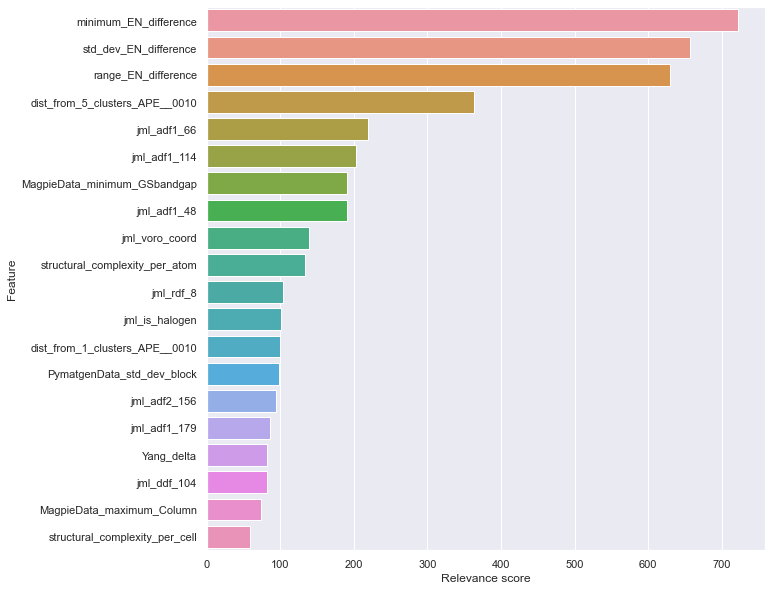

In [5]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [6]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = True, 
                    oversample_technique = 'smoothed_ros', 
                    chosen_metric = 'f1_score',
                    average = 'weighted',
                    no_to_terminate = 100,
                    max_no_imp = 10
                    )

   No. of rows in training set:  675
No. of features considering:  1

n=1: train_acc=0.7481, validation_acc=0.5917 

n=1: train_b_acc=0.6837, validation_b_acc=0.4715 

n=1: train_hl=0.2519 validation_hl=0.4083 

n=1: train_f1=0.7378, validation_f1=0.5469 

n=1: train_roc_auc=0.7967, validation_roc_auc=0.4958 

n=1: train_avg_precision)=0.8883, validation_avg_precision)=0.7064 

--- 0.14313054084777832 seconds --- 

No. of features considering:  2

n=2: train_acc=0.9096, validation_acc=0.7988 

n=2: train_b_acc=0.9051, validation_b_acc=0.7709 

n=2: train_hl=0.0904 validation_hl=0.2012 

n=2: train_f1=0.9103, validation_f1=0.7988 

n=2: train_roc_auc=0.9766, validation_roc_auc=0.8344 

n=2: train_avg_precision)=0.9884, validation_avg_precision)=0.8826 

--- 0.21919965744018555 seconds --- 

No. of features considering:  3

n=3: train_acc=0.9111, validation_acc=0.7988 

n=3: train_b_acc=0.9051, validation_b_acc=0.7709 

n=3: train_hl=0.0889 validation_hl=0.2012 

n=3: train_f1=0.9116, va

,train_acc,validation_acc,train_b_acc,validation_b_acc,train_hamming,validation_hamming,train_avg_precision,validation_avg_precision,train_roc_auc,validation_roc_auc,train_f1,validation_f1
no_of_features,,,,,,,,,,,,
1,0.748148,0.591716,0.683730,0.471531,0.251852,0.408284,0.888331,0.706391,0.796706,0.495774,0.737796,0.546923
2,0.909630,0.798817,0.905107,0.770893,0.090370,0.201183,0.988386,0.882629,0.976617,0.834370,0.910257,0.798817
3,0.911111,0.798817,0.905062,0.770893,0.088889,0.201183,0.988724,0.885221,0.977413,0.835805,0.911594,0.798817
4,0.974815,0.810651,0.980088,0.760845,0.025185,0.189349,0.999109,0.952425,0.998310,0.900080,0.975014,0.805161
5,0.985185,0.846154,0.985517,0.801276,0.014815,0.153846,0.999706,0.939540,0.999473,0.896332,0.985218,0.841694
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,0.857988,1.000000,0.781818,0.000000,0.142012,1.000000,0.980272,1.000000,0.961722,1.000000,0.844935
96,1.000000,0.863905,1.000000,0.790909,0.000000,0.136095,1.000000,0.976705,1.000000,0.954705,1.000000,0.852151
97,1.000000,0.840237,1.000000,0.754545,0.000000,0.159763,1.000000,0.977905,1.000000,0.956459,1.000000,0.822709


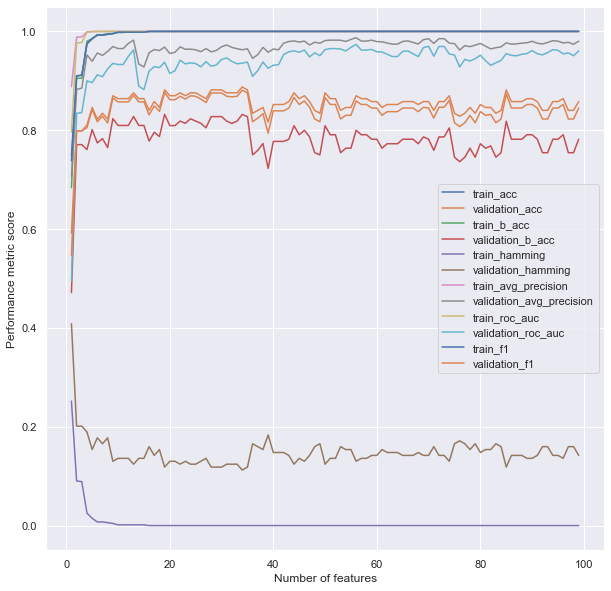

Result saved as: GBFS_convergence_plot_pot_ferroelectric.png


<Figure size 720x720 with 0 Axes>

In [7]:
# Plot the result
FS.convergence_plot()

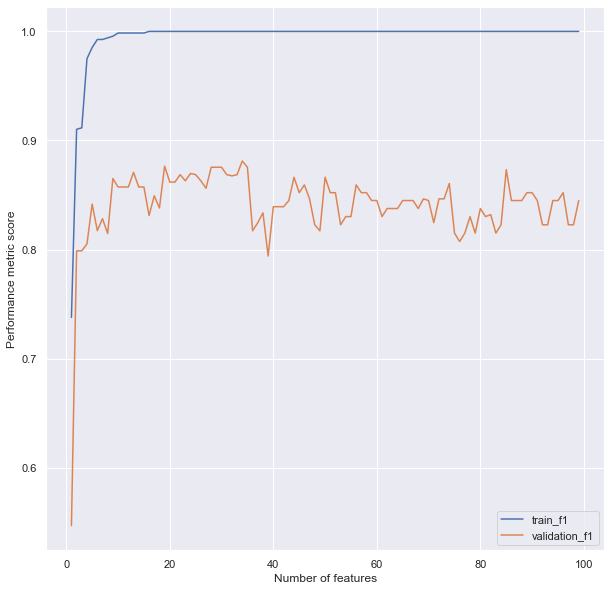

Result saved as: GBFS_convergence_plot_pot_ferroelectric.png


<Figure size 720x720 with 0 Axes>

In [8]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_f1',
                    validation_metric = 'validation_f1'
                    )

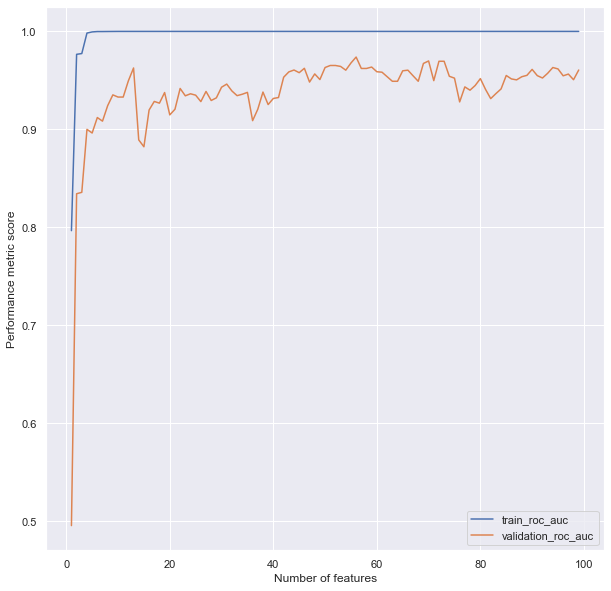

Result saved as: GBFS_convergence_plot_pot_ferroelectric.png


<Figure size 720x720 with 0 Axes>

In [9]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_roc_auc',
                    validation_metric = 'validation_roc_auc'
                    )

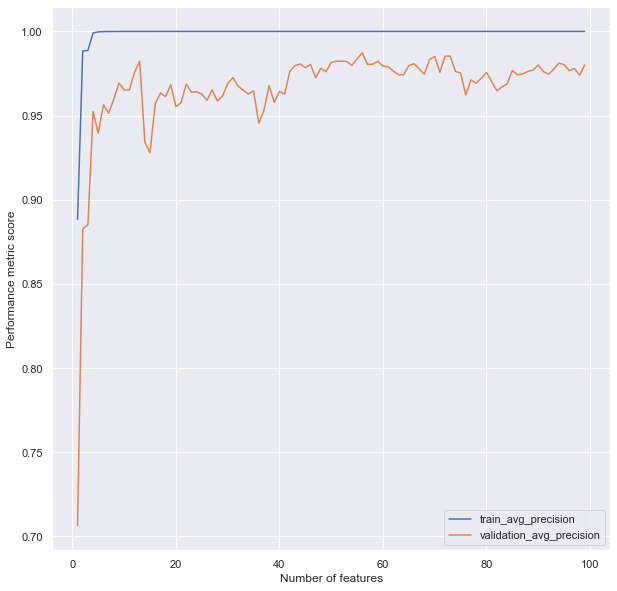

Result saved as: GBFS_convergence_plot_pot_ferroelectric.png


<Figure size 720x720 with 0 Axes>

In [10]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_avg_precision',
                    validation_metric = 'validation_avg_precision'
                    )

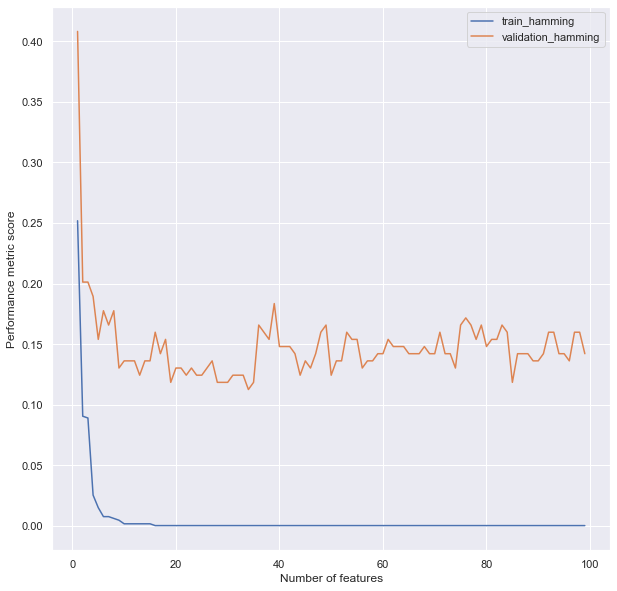

Result saved as: GBFS_convergence_plot_pot_ferroelectric.png


<Figure size 720x720 with 0 Axes>

In [11]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_hamming',
                    validation_metric = 'validation_hamming'
                    )

In [12]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Classification

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [2]:
# Target
target = 'pot_ferroelectric'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/4. dielectric_constant (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_ferroelectric.pkl'

problem = 'classification'

In [3]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  pot_ferroelectric
No. of exploratory features:  3968


In [4]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  917
No. of exploratory features:  3051


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,range_EN_difference,...,LUMO_element_ohe_Zn,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,pot_ferroelectric
375,0.25,0.714286,0.888889,0.763072,0.042527,0.010008,0.423770,0.170783,0.169315,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True
165,0.50,0.571429,0.666667,0.750000,0.038453,0.034339,0.350227,0.196532,0.194842,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
872,0.75,0.285714,0.333333,0.298807,0.750839,0.590229,0.472710,0.494220,0.707736,0.337778,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True
865,0.50,0.714286,0.777778,0.740566,0.640920,0.412422,0.541910,0.450867,0.627507,0.280000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
1014,0.25,0.285714,0.555556,0.467707,0.341752,0.248147,0.497076,0.202312,0.438395,0.368889,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True


In [5]:
df_anova = analyses.ANOVA_F_test(
                                problem=problem, 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  123
No. of numerical features:  2928 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_pot_ferroelectric_classification.pkl


,feature_names,f_statistic,f_statistic_scaled
0,PymatgenData_range_block,153.920475,1.000000e+00
1,DemlData_minimum_first_ioniz,145.469555,9.450955e-01
2,PymatgenData_range_mendeleev_no,134.676033,8.749715e-01
3,range_local_difference_in_NsUnfilled,134.495263,8.737971e-01
4,range_local_difference_in_NsValence,133.722143,8.687742e-01
...,...,...,...
2923,ReDF_655000__660000A,0.000092,5.872655e-07
2924,ReDF_290000__295000A,0.000071,4.541769e-07
2925,jml_nn_32,0.000019,1.177003e-07
2926,OFM_s1__p1,0.000002,6.230340e-09


In [6]:
df_chi2 = analyses.chi2_test(csv=False)

df_chi2

There are:
No. of categorical features:  123
Result saved as: chi_squared_test_result_pot_ferroelectric .pkl


,feature_names,chi_squared,chi_squared_scaled
0,crystal_system_ohe_monoclinic,21.604826,1.000000
1,crystal_system_ohe_tetragonal,18.166065,0.840831
2,LUMO_element_ohe_Rb,15.817911,0.732143
3,LUMO_character_ohe_d,12.980046,0.600787
4,LUMO_element_ohe_Zn,12.539293,0.580386
...,...,...,...
118,LUMO_element_ohe_Sn,0.001793,0.000066
119,LUMO_element_ohe_H,0.001435,0.000050
120,LUMO_element_ohe_Al,0.001076,0.000033
121,HOMO_element_ohe_Mo,0.000717,0.000017


In [7]:
df_mi = analyses.mutual_information(
                                problem=problem, 
                                csv=False
                                )

df_mi 

There are:
No. of categorical features:  123
No. of numerical features:  2928 

Result saved as: MI_result_pot_ferroelectric.pkl


,feature_names,MI,MI_scaled
0,PymatgenData_std_dev_group,0.490765,1.000000
1,DemlData_std_dev_row_num,0.482737,0.983642
2,DemlData_std_dev_col_num,0.482508,0.983176
3,jml_first_ion_en_divi_therm_cond,0.461398,0.940162
4,PymatgenData_std_dev_row,0.454346,0.925791
...,...,...,...
2734,OFM_p2__p4,0.000000,0.000000
2733,OFM_p2__p1,0.000000,0.000000
2732,OFM_p2__d9,0.000000,0.000000
2731,OFM_p2__d7,0.000000,0.000000


In [8]:
df_ld = analyses.logistic_discrimination(
                                        target_classes=2, 
                                        class_names=['Direct', 'Indirect'], 
                                        csv=False
                                        )

df_ld

Result saved as: logistic_discrimination_result_pot_ferroelectric.pkl


,feature_names,coefficient
0,minimum_oxidation_state,0.003999
1,maximum_oxidation_state,0.174691
2,range_oxidation_state,-0.199569
3,std_dev_oxidation_state,0.021528
4,compound_possible,0.000322
...,...,...
3046,jml_mean_charge_318,0.061501
3047,jml_mean_charge_319,-0.026601
3048,jml_mean_charge_320,-0.247709
3049,jml_mean_charge_321,-0.245943


#### Feature Engineering 

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 'pot_ferroelectric'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/4. dielectric_constant (done)/'
path_to_save = path + target + '_results/'
path_to_file = path + 'database_dielectric_constant_merged.pkl'  # all data

# Either a list or saved file
features = path + 'features_ferroelectric.pkl'

problem = 'classification'

In [11]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_' + problem + '.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,PymatgenData_range_block,153.920475,1.000000
1,DemlData_minimum_first_ioniz,145.469555,0.945096
2,PymatgenData_range_mendeleev_no,134.676033,0.874972
3,range_local_difference_in_NsUnfilled,134.495263,0.873797
4,range_local_difference_in_NsValence,133.722143,0.868774


In [12]:
# Top n features from chi2 
df_chi2 = joblib.load(path_to_save + 'chi_squared_test_result_' + target + '.pkl')

# Top n features
n = 5
chi2_features = df_chi2['feature_names'].tolist()[:n]

df_chi2.iloc[:n, :]

,feature_names,chi_squared,chi_squared_scaled
0,crystal_system_ohe_monoclinic,21.604826,1.000000
1,crystal_system_ohe_tetragonal,18.166065,0.840831
2,LUMO_element_ohe_Rb,15.817911,0.732143
3,LUMO_character_ohe_d,12.980046,0.600787
4,LUMO_element_ohe_Zn,12.539293,0.580386


In [13]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,PymatgenData_std_dev_group,0.490765,1.000000
1,DemlData_std_dev_row_num,0.482737,0.983642
2,DemlData_std_dev_col_num,0.482508,0.983176
3,jml_first_ion_en_divi_therm_cond,0.461398,0.940162
4,PymatgenData_std_dev_row,0.454346,0.925791


In [14]:
# Top n features from LR 
df_ld = joblib.load(path_to_save + 'logistic_discrimination_result_' + target + '.pkl')

# Top and bottom n features
n = 2
df_ld = df_ld.sort_values('coefficient')
ld_features = df_ld['feature_names'].tolist()[:n] + df_ld['feature_names'].tolist()[-n:]

df_ld.iloc[:n, :], df_ld.iloc[-n:, :]

(                           feature_names  coefficient
 407  MEGNetElementData_range_embedding_3    -0.964504
 337           DemlData_range_atom_radius    -0.964504,
                 feature_names  coefficient
 120   MagpieData_range_Number     0.945759
 1105               OFM_p2__p2     0.964546)

In [15]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,minimum_EN_difference,722.159977
1,std_dev_EN_difference,657.218521
2,range_EN_difference,630.165006
3,dist_from_5_clusters_APE__0010,363.549290
4,jml_adf1_66,219.075291


In [16]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  pot_ferroelectric
No. of exploratory features:  3968


In [17]:
# Join the features
feature_list = anova_features + chi2_features + mi_features + ld_features + gbfs_features

print(len(feature_list))
print(feature_list)

24
['PymatgenData_range_block', 'DemlData_minimum_first_ioniz', 'PymatgenData_range_mendeleev_no', 'range_local_difference_in_NsUnfilled', 'range_local_difference_in_NsValence', 'crystal_system_ohe_monoclinic', 'crystal_system_ohe_tetragonal', 'LUMO_element_ohe_Rb', 'LUMO_character_ohe_d', 'LUMO_element_ohe_Zn', 'PymatgenData_std_dev_group', 'DemlData_std_dev_row_num', 'DemlData_std_dev_col_num', 'jml_first_ion_en_divi_therm_cond', 'PymatgenData_std_dev_row', 'MEGNetElementData_range_embedding_3', 'DemlData_range_atom_radius', 'MagpieData_range_Number', 'OFM_p2__p2', 'minimum_EN_difference', 'std_dev_EN_difference', 'range_EN_difference', 'dist_from_5_clusters_APE__0010', 'jml_adf1_66']


In [18]:
# Perform feature engineering
df, new_cols = perform.brute_force(
                    feature_list = feature_list
                    )

df.head()

Total number of permutation: 552
Invalid operations: 0


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,jml_adf1_66/PymatgenData_std_dev_row,jml_adf1_66/MEGNetElementData_range_embedding_3,jml_adf1_66/DemlData_range_atom_radius,jml_adf1_66/MagpieData_range_Number,jml_adf1_66/OFM_p2__p2,jml_adf1_66/minimum_EN_difference,jml_adf1_66/std_dev_EN_difference,jml_adf1_66/range_EN_difference,jml_adf1_66/dist_from_5_clusters_APE__0010,pot_ferroelectric
0,-2,1,3,2.121320,1,0.336084,0.074685,-380400.0,1.28,1.28,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,False
1,-1,2,3,2.121320,1,0.417383,0.092752,-349000.0,1.47,1.47,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,False
2,-1,2,3,2.121320,1,0.265103,0.058912,-295200.0,1.11,1.11,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,False
3,-3,3,6,4.242641,1,0.609724,0.152431,-21000.0,1.94,1.94,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,False
4,-1,2,3,2.121320,1,0.771501,0.171445,-328000.0,2.43,2.43,...,2.828427,10.027206,0.044444,0.25,0.0,1.646091,0.0,0.0,4.0,False


In [19]:
perform.save()

Result saved as: df_pot_ferroelectric_engineered_features.pkl
Result saved as: features_pot_ferroelectric_engineered.pkl
Result saved as: df_train_pot_ferroelectric_engineered.pkl
Result saved as: df_test_pot_ferroelectric_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'pot_ferroelectric'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/4. dielectric_constant (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 50 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'classification'

print('No. of columns from GBFS:', len(gbfs_cols))
print('No. of new columns:',len(new_cols))

len(features)

No. of columns from GBFS: 50
No. of new columns: 552


602

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  pot_ferroelectric
No. of exploratory features:  602


In [4]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  269
Features saved as: features_selected_from_correlation_analysis_pot_ferroelectric.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_pot_ferroelectric.png


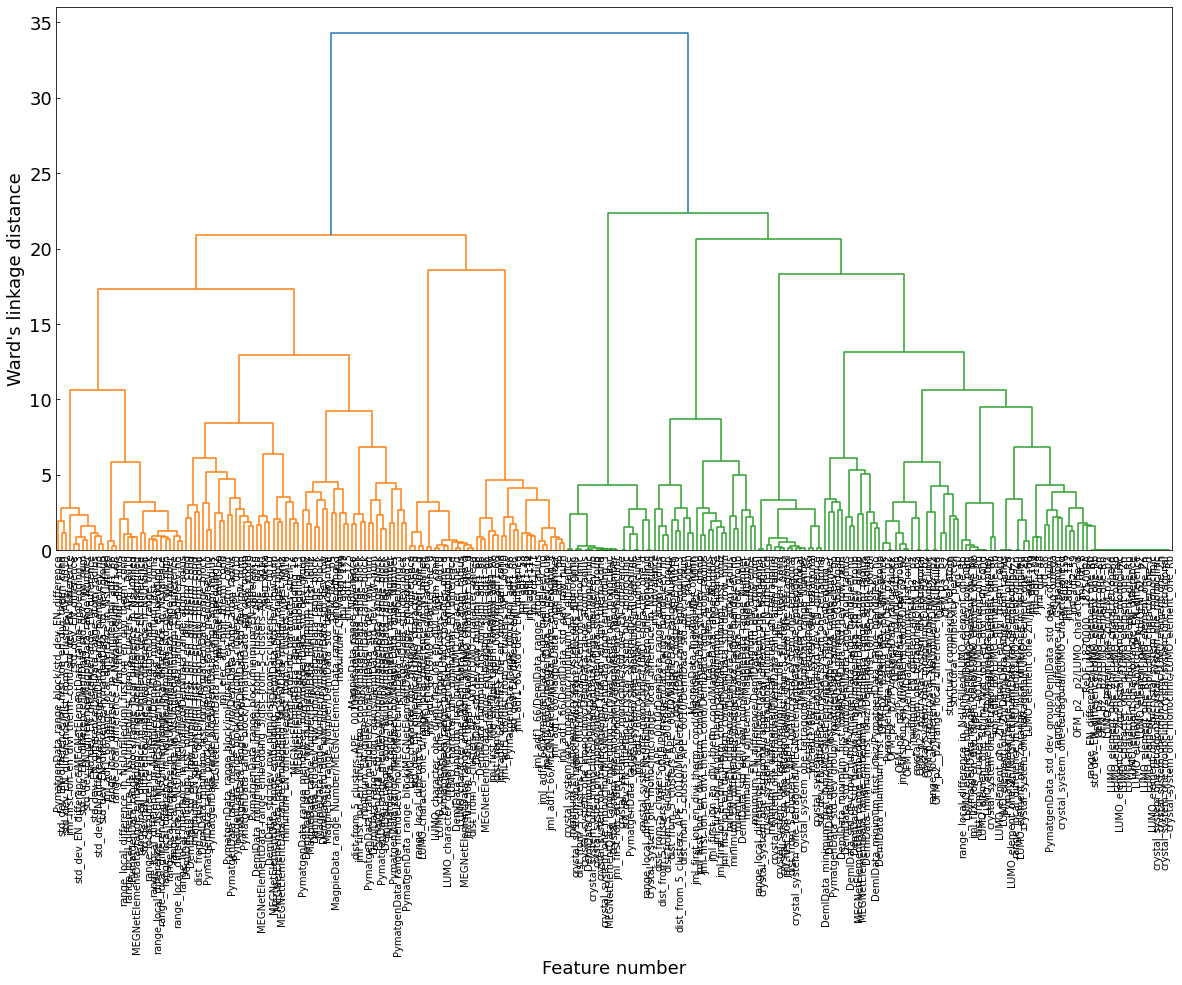

In [5]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [6]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  165
Features saved as features_selected_from_hierarchical_analysis_pot_ferroelectric_threshold_1.pkl
Number of features remaining:  106
Features saved as features_selected_from_hierarchical_analysis_pot_ferroelectric_threshold_2.pkl
Number of features remaining:  57
Features saved as features_selected_from_hierarchical_analysis_pot_ferroelectric_threshold_3.pkl
Number of features remaining:  39
Features saved as features_selected_from_hierarchical_analysis_pot_ferroelectric_threshold_4.pkl
Number of features remaining:  27
Features saved as features_selected_from_hierarchical_analysis_pot_ferroelectric_threshold_5.pkl


In [8]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Test Dummy Model

In [7]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [8]:
# Target
target = 'pot_ferroelectric'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/4. dielectric_constant (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'classification'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
len(features)

106

In [9]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        random_state=42,
                        learning_rate=0.1,
                        n_estimators=400,
                        num_leaves=40,
                        #target_classes=['Direct', 'Indirect']
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', n_estimators=400, num_leaves=40,
               objective='binary', random_state=42)

In [10]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['Indirect', 'Direct'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))

1. The F-1 score of the model 0.9250857632933105

2. The recall score of the model 0.9245283018867925

3. Classification report 
               precision    recall  f1-score   support

    Indirect      0.867     0.935     0.900        77
      Direct      0.961     0.919     0.939       135

    accuracy                          0.925       212
   macro avg      0.914     0.927     0.920       212
weighted avg      0.927     0.925     0.925       212
 

4. Classification report 
 [[[124  11]
  [  5  72]]

 [[ 72   5]
  [ 11 124]]] 

5. Confusion matrix 
 [[ 72   5]
 [ 11 124]] 

6. Accuracy score 
 0.9245283018867925 

7. Balanced accuracy score 
 0.9267917267917267 



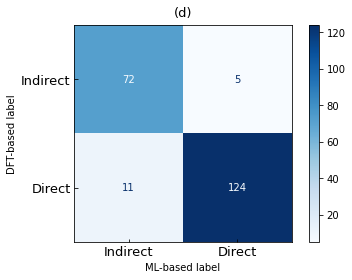

In [11]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['Indirect', 'Direct'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )

disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
# plt.savefig('confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

#### Recursive Feature Elimination

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [2]:
# Target
target = 'pot_ferroelectric'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/4. dielectric_constant (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_3.pkl')
print(len(features))

scaled = False

problem = 'classification'

57


In [3]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: pot_ferroelectric
No. of features: 57


In [4]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM', objective='binary')
RFE_features = run.perform(cv_fold=10)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

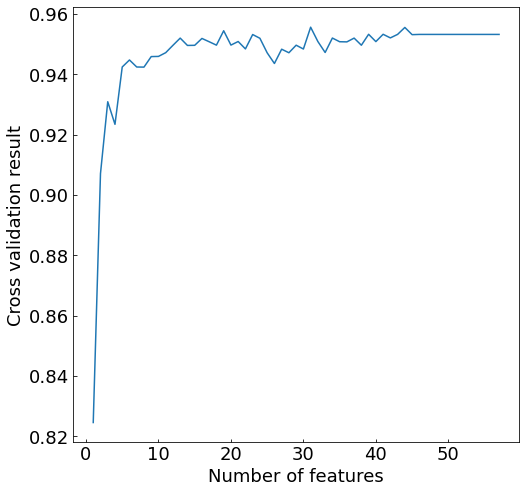

Figure saved as: RFE_plot_pot_ferroelectric.png


In [5]:
# Plot figure
run.RFE_plot()

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'pot_ferroelectric'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/4. dielectric_constant (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  pot_ferroelectric
No. of exploratory features:  31


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM', objective='binary')

LGBMClassifier(importance_type='gain', objective='binary', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.012281655036123568, 'n_estimators': 102, 'num_leaves': 16} 

Score:  -0.9397067994052491 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.2070
Function value obtained: -0.9397
Current minimum: -0.9397
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.043569332347432245, 'n_estimators': 561, 'num_leaves': 50} 

Score:  -0.9505716977950762 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.6335
Function value obtained: -0.9506
Current minimum: -0.9506
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.36831806961802316, 'n_estimators': 429, 'num_leaves': 64} 

Score:  -0.9517597586996231 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.3332
Function value obtained: -0.9518
Current minimum: -0.9518
Iteration No: 4 started. Evaluating function at random point.

 {'learning_ra

Saved: Optimisation_result_pot_ferroelectric.png


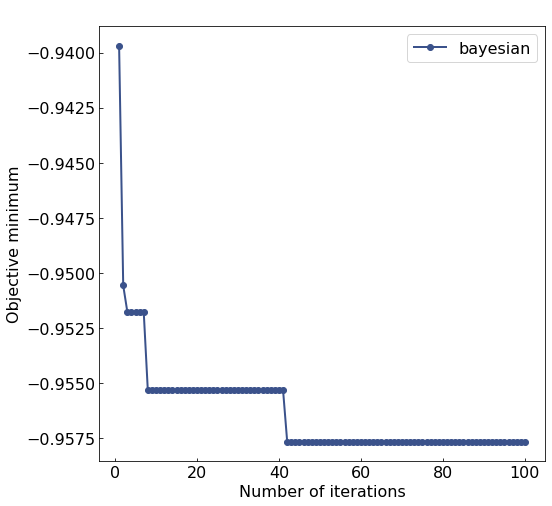

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

<Figure size 720x720 with 0 Axes>

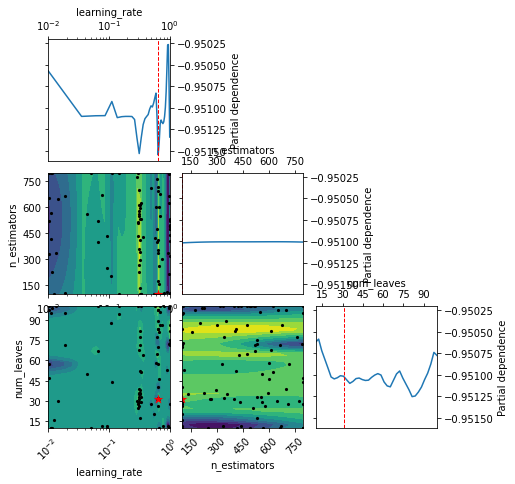

<Figure size 720x720 with 0 Axes>

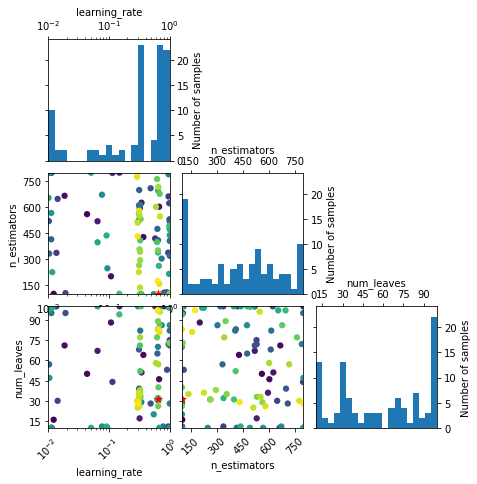

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

<Figure size 720x720 with 0 Axes>

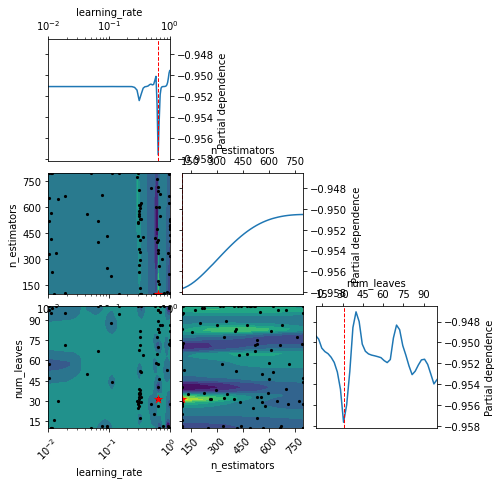

In [9]:
# objective and evaluation plot # expected_minimum_random, expected_minimum
final_stage.objective_plot_adjust(sample_source='expected_minimum', minimum='expected_minimum', n_minimum_search=2)

In [10]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMClassifier(importance_type='gain', learning_rate=0.6450455190072896,
               objective='binary', random_state=42)

1. The F-1 score of the model 0.9201269564348494

2. The recall score of the model 0.9198113207547169

3. Classification report 
               precision    recall  f1-score   support

       False       0.88      0.91      0.89        77
        True       0.95      0.93      0.94       135

    accuracy                           0.92       212
   macro avg       0.91      0.92      0.91       212
weighted avg       0.92      0.92      0.92       212
 

4. Classification report 
 [[[125  10]
  [  7  70]]

 [[ 70   7]
  [ 10 125]]] 

5. Confusion matrix 
 [[ 70   7]
 [ 10 125]] 

6. Accuracy score 
 0.9198113207547169 

7. Balanced accuracy score 
 0.9175084175084175 



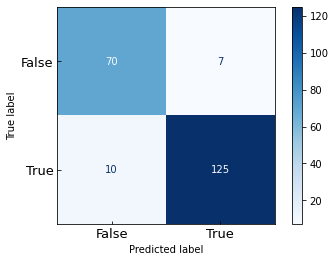

Saved: Confusion_matrix_pot_ferroelectric.png


In [11]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy='weighted', 
                    target_names=['False', 'True']
                    )


roc_auc_score: 0.9696007696007697


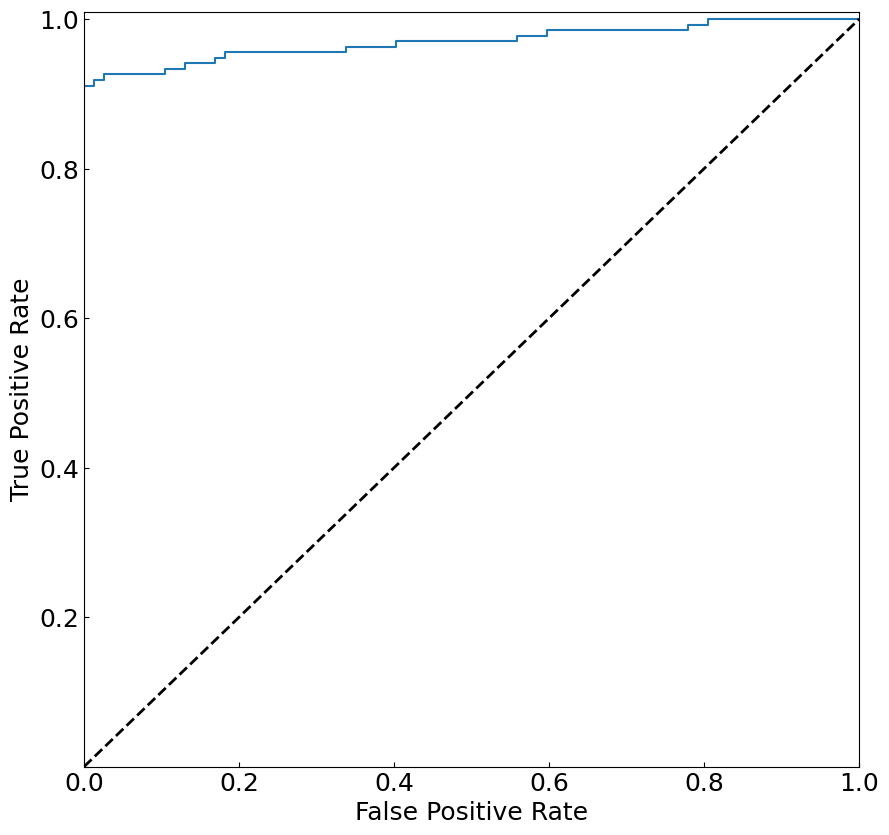

Saved: Receiver_operating_characteristic_curve_pot_ferroelectric.png


In [12]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=True,
                positive_class=1
                )

Possible DET equal error rate (see the plot and find the correct value): [1.0]


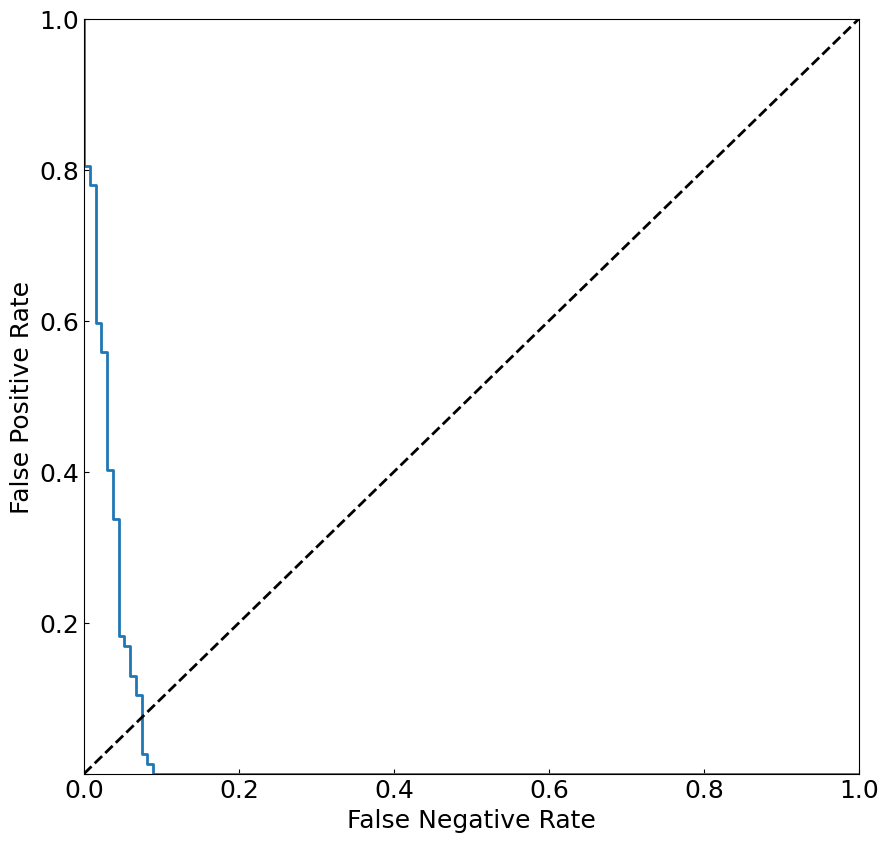

Saved: detection_error_tradeoff_curves_pot_ferroelectric.png


In [13]:
# Evaluate model using test set
final_stage.DET()

average_precision: 0.9864350793761507


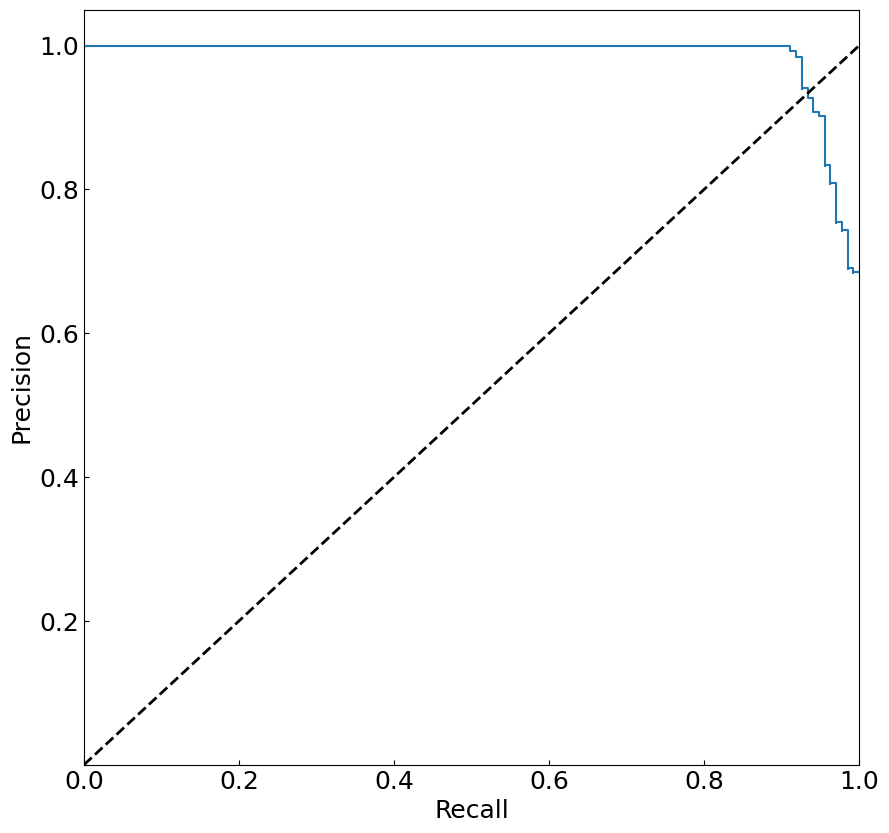

Saved: precision_recall_pot_ferroelectric.png


In [14]:
# Evaluate model using test set
final_stage.PR(positive_class=1)

### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'pot_ferroelectric'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/4. dielectric_constant (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)
len(features)

31

In [4]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        learning_rate=0.6450455190072896,
                        n_estimators=100,
                        num_leaves=30,
                        random_state=42
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', learning_rate=0.6450455190072896,
               num_leaves=30, objective='binary', random_state=42)

In [5]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['Indirect', 'Direct'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))

# Indirect -> False
# Direct -> True

1. The F-1 score of the model 0.929523785089573

2. The recall score of the model 0.9292452830188679

3. Classification report 
               precision    recall  f1-score   support

    Indirect      0.887     0.922     0.904        77
      Direct      0.955     0.933     0.944       135

    accuracy                          0.929       212
   macro avg      0.921     0.928     0.924       212
weighted avg      0.930     0.929     0.930       212
 

4. Classification report 
 [[[126   9]
  [  6  71]]

 [[ 71   6]
  [  9 126]]] 

5. Confusion matrix 
 [[ 71   6]
 [  9 126]] 

6. Accuracy score 
 0.9292452830188679 

7. Balanced accuracy score 
 0.9277056277056277 



In [6]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, average_precision_score

print(roc_auc_score(np.array(y_test.tolist()), y_pred[:, 1], average='macro'))

print(matthews_corrcoef(np.array(y_test.tolist()), y_pred_2))

y_test_2 = label_binarize(y_test, classes = list(range(2)))
print(average_precision_score(y_test_2, y_pred[:, 1], average="macro"))

0.9703703703703703
0.8487020439389011
0.9866779457166295


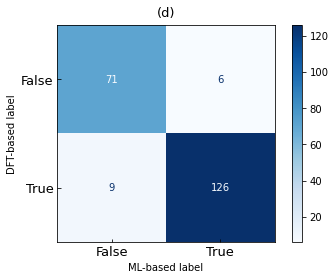

In [7]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['False', 'True'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )

disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
plt.savefig(path_to_save + 'confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

In [9]:
df_test.groupby([target]).count()

,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,jml_adf1_66/jml_first_ion_en_divi_therm_cond,jml_adf1_66/PymatgenData_std_dev_row,jml_adf1_66/MEGNetElementData_range_embedding_3,jml_adf1_66/DemlData_range_atom_radius,jml_adf1_66/MagpieData_range_Number,jml_adf1_66/OFM_p2__p2,jml_adf1_66/minimum_EN_difference,jml_adf1_66/std_dev_EN_difference,jml_adf1_66/range_EN_difference,jml_adf1_66/dist_from_5_clusters_APE__0010
pot_ferroelectric,,,,,,,,,,,,,,,,,,,,,
False,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
True,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135


[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

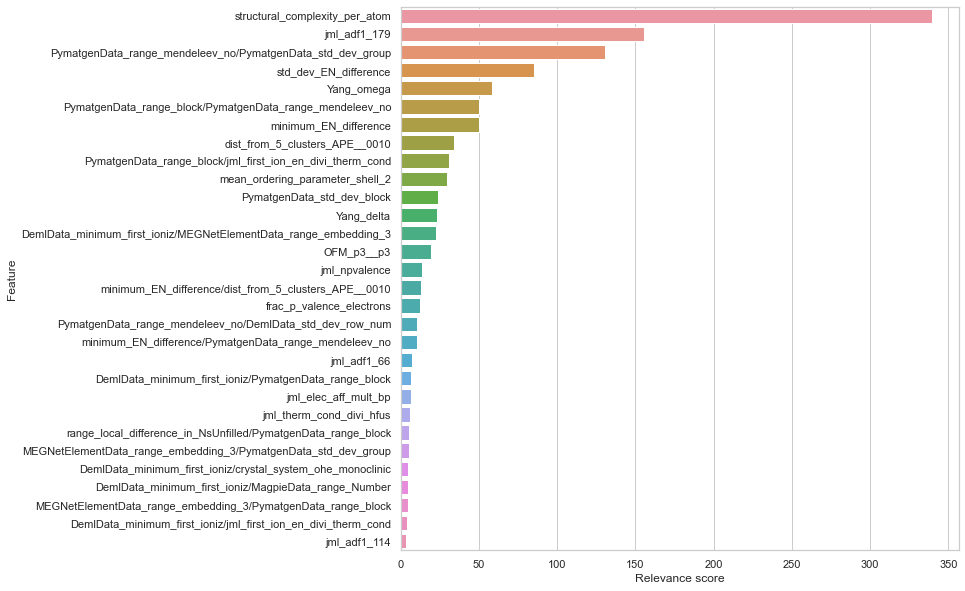

In [10]:
import seaborn as sns
# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)